## Ingestion of Urban Atlas 2018 10m raster

In [1]:
# Configure plots for inline use in Jupyter Notebook
%matplotlib inline

import datetime as dt

# Utilities
import boto3
import dateutil
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import rasterio

# Sentinel Hub
from sentinelhub import (
    CRS,
    BBox,
    ByocCollection,
    ByocCollectionAdditionalData,
    ByocCollectionBand,
    ByocTile,
    DataCollection,
    DownloadFailedException,
    MimeType,
    SentinelHubBYOC,
    SentinelHubRequest,
    SHConfig,
    bbox_to_dimensions,
    os_utils,
)

config = SHConfig()
config.instance_id = os.environ.get("SH_INSTANCE_ID")
config.sh_client_id = os.environ.get("SH_CLIENT_ID")
config.sh_client_secret = os.environ.get("SH_CLIENT_SECRET")
config.aws_access_key_id = os.environ.get("username")
config.aws_secret_access_key = os.environ.get("password")
    
    
    

In [2]:
# Initialize SentinelHubBYOC class
byoc = SentinelHubBYOC(config=config)

new_collection = ByocCollection(name="UrbanAtlas2018_10m_raster_v1", s3_bucket="hub-fairicube0")
#byoc.delete_collection(new_collection) # for the delte of the collection
created_collection = byoc.create_collection(new_collection)
my_collection = byoc.get_collection(created_collection["id"])


#https://sentinelhub-py.readthedocs.io/en/latest/examples/byoc_request.html#Create-new-collection

input_folder ="data/d002_urban_atlas"

tile_list = [
        "ua2018_mosaic_raster_10m_cog_5_6_B1.tif",
        "ua2018_mosaic_raster_10m_cog_5_5_B1.tif",
        "ua2018_mosaic_raster_10m_cog_5_4_B1.tif",
        "ua2018_mosaic_raster_10m_cog_5_3_B1.tif",
        "ua2018_mosaic_raster_10m_cog_5_2_B1.tif",
        "ua2018_mosaic_raster_10m_cog_5_1_B1.tif",
        "ua2018_mosaic_raster_10m_cog_4_6_B1.tif",
        "ua2018_mosaic_raster_10m_cog_4_5_B1.tif",
        "ua2018_mosaic_raster_10m_cog_4_4_B1.tif",
        "ua2018_mosaic_raster_10m_cog_4_3_B1.tif",
        "ua2018_mosaic_raster_10m_cog_4_2_B1.tif",
        "ua2018_mosaic_raster_10m_cog_4_1_B1.tif",
        "ua2018_mosaic_raster_10m_cog_3_6_B1.tif",
        "ua2018_mosaic_raster_10m_cog_3_5_B1.tif",
        "ua2018_mosaic_raster_10m_cog_3_4_B1.tif",
        "ua2018_mosaic_raster_10m_cog_3_3_B1.tif",
        "ua2018_mosaic_raster_10m_cog_3_2_B1.tif",
        "ua2018_mosaic_raster_10m_cog_3_1_B1.tif",
        "ua2018_mosaic_raster_10m_cog_2_6_B1.tif",
        "ua2018_mosaic_raster_10m_cog_2_5_B1.tif",
        "ua2018_mosaic_raster_10m_cog_2_4_B1.tif",
        "ua2018_mosaic_raster_10m_cog_2_3_B1.tif",
        "ua2018_mosaic_raster_10m_cog_2_2_B1.tif",
        "ua2018_mosaic_raster_10m_cog_2_1_B1.tif",
        "ua2018_mosaic_raster_10m_cog_1_6_B1.tif",
        "ua2018_mosaic_raster_10m_cog_1_5_B1.tif",
        "ua2018_mosaic_raster_10m_cog_1_4_B1.tif",
        "ua2018_mosaic_raster_10m_cog_1_3_B1.tif",
        "ua2018_mosaic_raster_10m_cog_1_2_B1.tif",
        "ua2018_mosaic_raster_10m_cog_1_1_B1.tif"
            ]

for tile in tile_list:
    tile_part_l = tile.split("_")
    tile_part =tile_part_l[0]+"_"+tile_part_l[1]+"_"+tile_part_l[2]+"_"+tile_part_l[3]+"_"+tile_part_l[4]+"_"+tile_part_l[5]+"_"+tile_part_l[6]+"_(BAND).tif"
    #tile_part =  tile[:33]+"(BAND).tif"
    print(tile_part)

    input_raster_file=tile_part
    path_link = input_folder+"/"+input_raster_file  
    #print ("path link = " + path_link
    new_tile= ByocTile(path=path_link) 
    created_tile = byoc.create_tile(created_collection, new_tile)
    tile = byoc.get_tile(collection=created_collection["id"], tile=created_tile["id"])
    tile
##print (my_collection)

ua2018_mosaic_raster_10m_cog_5_6_(BAND).tif
ua2018_mosaic_raster_10m_cog_5_5_(BAND).tif
ua2018_mosaic_raster_10m_cog_5_4_(BAND).tif
ua2018_mosaic_raster_10m_cog_5_3_(BAND).tif
ua2018_mosaic_raster_10m_cog_5_2_(BAND).tif
ua2018_mosaic_raster_10m_cog_5_1_(BAND).tif
ua2018_mosaic_raster_10m_cog_4_6_(BAND).tif
ua2018_mosaic_raster_10m_cog_4_5_(BAND).tif
ua2018_mosaic_raster_10m_cog_4_4_(BAND).tif
ua2018_mosaic_raster_10m_cog_4_3_(BAND).tif
ua2018_mosaic_raster_10m_cog_4_2_(BAND).tif
ua2018_mosaic_raster_10m_cog_4_1_(BAND).tif
ua2018_mosaic_raster_10m_cog_3_6_(BAND).tif
ua2018_mosaic_raster_10m_cog_3_5_(BAND).tif
ua2018_mosaic_raster_10m_cog_3_4_(BAND).tif
ua2018_mosaic_raster_10m_cog_3_3_(BAND).tif
ua2018_mosaic_raster_10m_cog_3_2_(BAND).tif
ua2018_mosaic_raster_10m_cog_3_1_(BAND).tif
ua2018_mosaic_raster_10m_cog_2_6_(BAND).tif
ua2018_mosaic_raster_10m_cog_2_5_(BAND).tif
ua2018_mosaic_raster_10m_cog_2_4_(BAND).tif
ua2018_mosaic_raster_10m_cog_2_3_(BAND).tif
ua2018_mosaic_raster_10m_cog_2_2

In [129]:
#xx error hello world
##for collection in my_collections:   
 # byoc.delete_collection(collection)
#print ("end")

In [5]:
# Initialize SentinelHubBYOC class
byoc = SentinelHubBYOC(config=config)
print ("START--------------------------")
# list collections and tiles
# from: https://sentinelhub-py.readthedocs.io/en/latest/examples/byoc_request.html
collections_iterator = byoc.iter_collections()
my_collections = list(collections_iterator)

for collection in my_collections:
    
    print("Collection name:", collection["name"])
    print("Collection id: ", collection["id"])
    tiles = list(byoc.iter_tiles(collection))
    for tile in tiles:
        print("Tile status: ", tile['status'])
        print("Tile created: ", tile['created'])
        if(tile['status'] == "FAILED"):
            print("Ingestion failed error: ", tile['additionalData'])
    print("-------------------")
print ("end")

START--------------------------
Collection name: UrbanAtlas2018_10m_raster_v1
Collection id:  27c95f8f-fb6b-46f2-8f84-2ce7761eeccd
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:07.907902Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:08.032911Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:06.063378Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:06.517056Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:07.339291Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:06.925264Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:07.502707Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:08.540383Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:08.404789Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:04.647122Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:08.672430Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:04.839411Z
Tile status:  INGESTED
Tile created:  2023-03-01T16:15:09.045712Z
Tile status

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


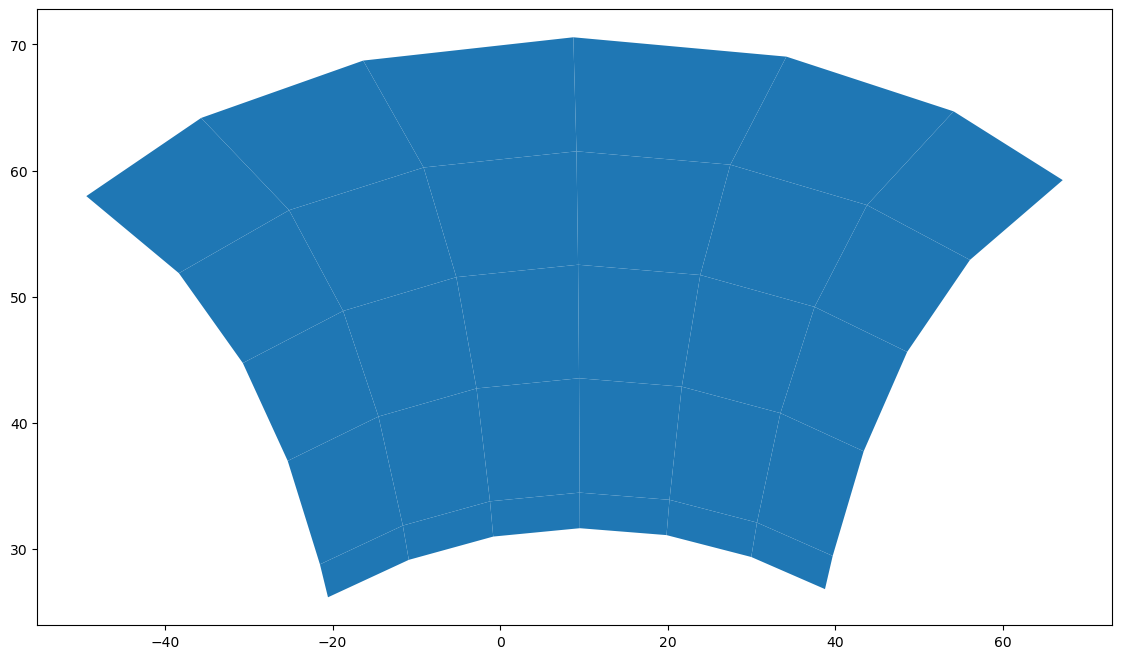

In [7]:
tile_iterator = byoc.iter_tiles(created_collection)

tiles_for_visualized = []
for i in range(30):
    print(i)
    tiles_for_visualized.append(ByocTile.from_dict(next(tile_iterator)))
   
tiles_gdf = gpd.GeoDataFrame(
    tiles_for_visualized,
    geometry=[t.cover_geometry.transform(CRS.WGS84).geometry for t in tiles_for_visualized],
    crs="epsg:4326",
)
tiles_gdf.head()
fig, ax = plt.subplots(figsize=(17, 8))
tiles_gdf.plot(ax=ax);